In [ ]:
# Assignment No 4
# Name-Chetan Babasaheb Wakale 
# Roll No-144
# Batch-T3 (B)
# PRN-UIT22M1136

In [ ]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, export_graphviz  
from sklearn.model_selection import train_test_split  
from sklearn import metrics  
from sklearn.preprocessing import LabelEncoder
from io import StringIO
from IPython.display import Image  
import pydotplus
from sklearn.tree import export_graphviz

In [22]:
df = pd.read_csv("Marriagedata.csv")

In [23]:
# Encode categorical columns
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le 

In [ ]:
feature_cols = ['Marriage_Type', 'Age_at_Marriage', 'Gender', 'Education_Level', 'Caste_Match', 
                'Religion', 'Parental_Approval', 'Urban_Rural', 'Dowry_Exchanged', 'Marital_Satisfaction', 
                'Children_Count', 'Income_Level', 'Years_Since_Marriage', 'Spouse_Working', 'Inter-Caste', 'Inter-Religion']
X = df[feature_cols] 
y = df['Marriage_Type'] 

In [25]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)  

In [32]:
clf = DecisionTreeClassifier()

# Train Decision Tree Classifier
clf = clf.fit(X_train, y_train)
clf = DecisionTreeClassifier(criterion="entropy", max_depth=4)
clf.fit(X_train, y_train)
# Predict the response for test dataset
y_pred = clf.predict(X_test)

In [35]:
# Model Accuracy
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.904


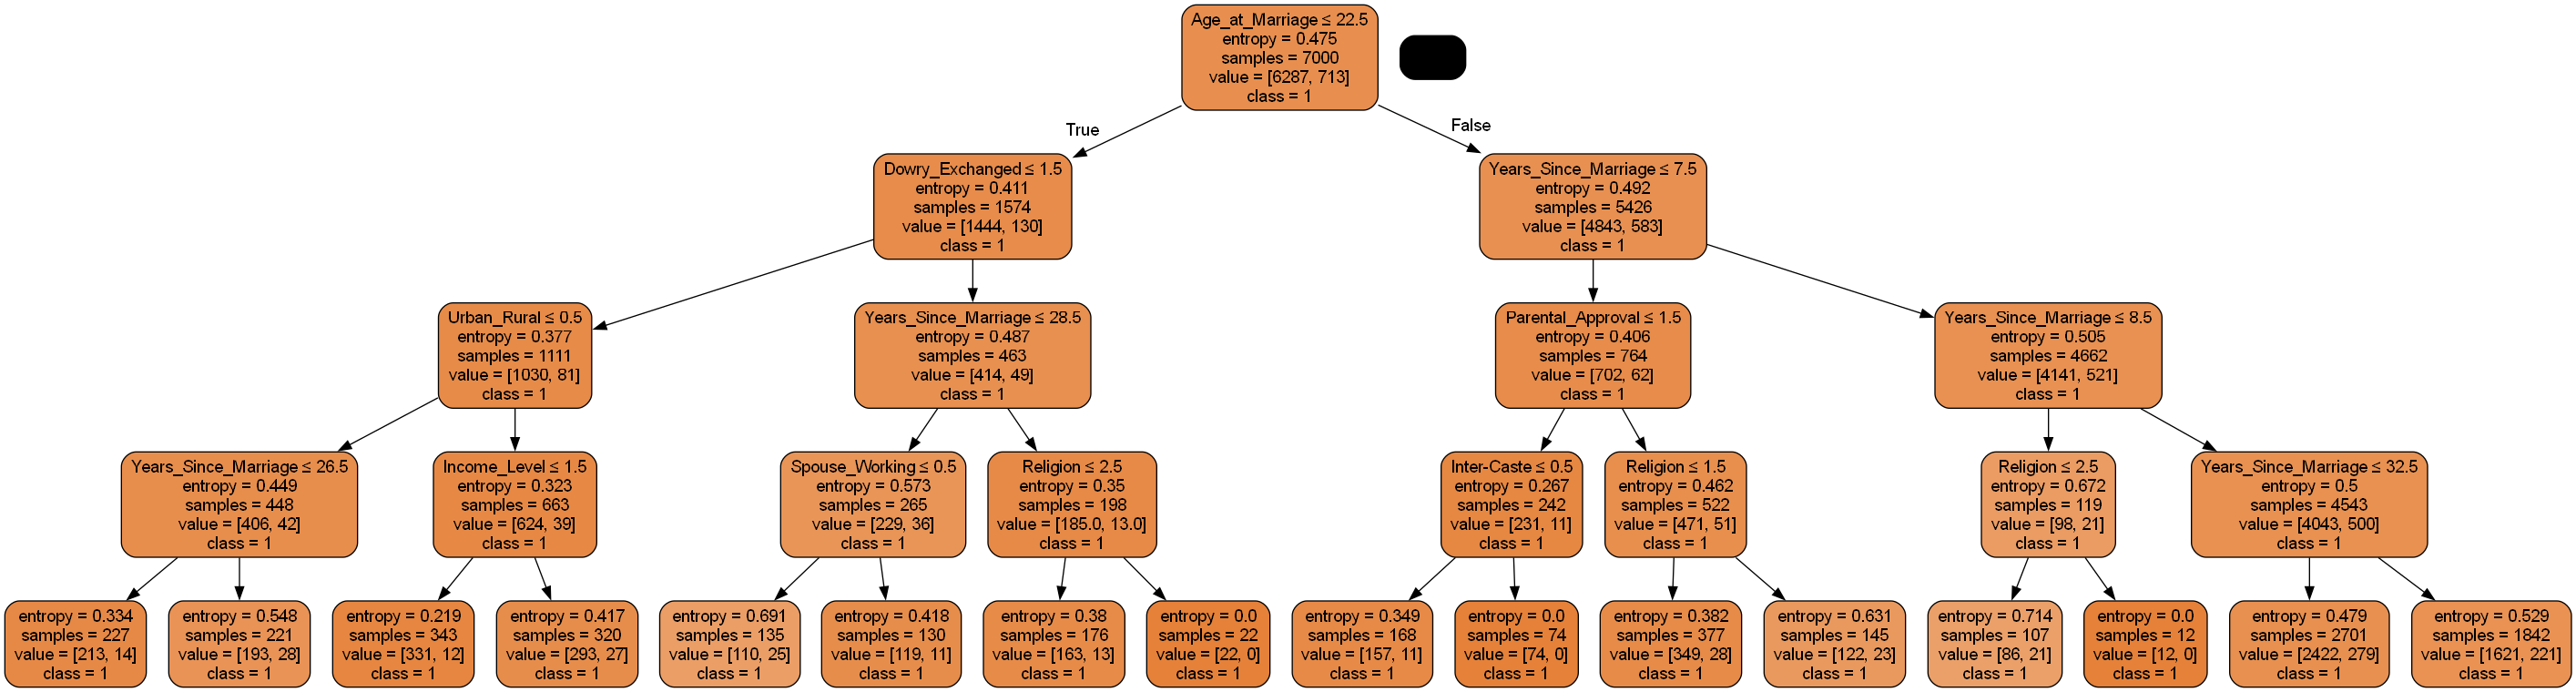

In [ ]:
# Generation of tree visualization
dot_data = StringIO() 
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names=feature_cols, class_names=df['Marriage_Type'].astype(str).unique().tolist())


graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Marriage_Type')
Image(graph.create_png())

In [41]:
# Create Decision Tree classifier object with entropy and max depth
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifier
clf = clf.fit(X_train, y_train)

# Predict the response for test dataset
y_pred = clf.predict(X_test)


In [42]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.904
